# Repaso regresión logística

Ejemplo de lo que podría ocurrir cuando tenemos dos variables muy correladas:

In [2]:
library(tidyverse)
radar<-read.csv("data/radar.csv", stringsAsFactors = T) |> select(-X)
radar$tipo<-relevel(radar$tipo,ref="ruido")
str(radar)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



'data.frame':	1079 obs. of  3 variables:
 $ distancia: int  0 1 2 3 6 7 10 11 12 13 ...
 $ potencia : num  0.0721 0.1813 0.1904 0.1003 0.0407 ...
 $ tipo     : Factor w/ 2 levels "ruido","avion": 1 1 1 1 1 1 1 1 1 1 ...


In [3]:
set.seed(123)
itrain<-sample(1:nrow(radar),round(nrow(radar)*0.7))
radar.train<- radar[itrain,]
radar.test <- radar[-itrain,]
summary(radar.train)
summary(radar.test)

   distancia        potencia           tipo    
 Min.   :  0.0   Min.   :0.000043   ruido:400  
 1st Qu.:110.0   1st Qu.:0.076630   avion:355  
 Median :210.0   Median :0.147003              
 Mean   :220.6   Mean   :0.155285              
 3rd Qu.:324.5   3rd Qu.:0.235799              
 Max.   :500.0   Max.   :0.437188              

   distancia         potencia           tipo    
 Min.   :  0.00   Min.   :0.002404   ruido:178  
 1st Qu.: 88.75   1st Qu.:0.074041   avion:146  
 Median :196.50   Median :0.134573              
 Mean   :209.83   Mean   :0.150259              
 3rd Qu.:313.25   3rd Qu.:0.226189              
 Max.   :498.00   Max.   :0.403745              

In [4]:
model_radar<-glm(data=radar.train,formula=tipo~distancia+potencia,family=binomial(link='logit'))
summary(model_radar)


Call:
glm(formula = tipo ~ distancia + potencia, family = binomial(link = "logit"), 
    data = radar.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7194  -0.3375  -0.0321   0.6282   1.6992  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.091937   0.805685  -12.53   <2e-16 ***
distancia     0.017380   0.001473   11.80   <2e-16 ***
potencia     35.429579   2.677117   13.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1043.97  on 754  degrees of freedom
Residual deviance:  521.57  on 752  degrees of freedom
AIC: 527.57

Number of Fisher Scoring iterations: 6


In [5]:
mc1<-table(real = radar.test$tipo,
      pred=factor(predict(model_radar,radar.test)>0,labels=c('ruido','avion')))
mc1

       pred
real    ruido avion
  ruido   165    13
  avion    11   135

**Con correlaciones muy altas**

In [6]:
radar$potencianW<-round(radar$potencia*1000)
radar$distanciaM<-radar$distancia*1000
cor(radar |> select(-tipo))

,distancia,potencia,potencianW,distanciaM
distancia,1.0000000,-0.3604463,-0.3604456,1.0000000
potencia,-0.3604463,1.0000000,0.9999951,-0.3604463
potencianW,-0.3604456,0.9999951,1.0000000,-0.3604456
distanciaM,1.0000000,-0.3604463,-0.3604456,1.0000000


In [7]:
set.seed(123)
itrain<-sample(1:nrow(radar),round(nrow(radar)*0.7))
radar.train<- radar[itrain,]
radar.test <- radar[-itrain,]
summary(radar.train)
summary(radar.test)

   distancia        potencia           tipo       potencianW   
 Min.   :  0.0   Min.   :0.000043   ruido:400   Min.   :  0.0  
 1st Qu.:110.0   1st Qu.:0.076630   avion:355   1st Qu.: 76.5  
 Median :210.0   Median :0.147003               Median :147.0  
 Mean   :220.6   Mean   :0.155285               Mean   :155.3  
 3rd Qu.:324.5   3rd Qu.:0.235799               3rd Qu.:236.0  
 Max.   :500.0   Max.   :0.437188               Max.   :437.0  
   distanciaM    
 Min.   :     0  
 1st Qu.:110000  
 Median :210000  
 Mean   :220620  
 3rd Qu.:324500  
 Max.   :500000  

   distancia         potencia           tipo       potencianW   
 Min.   :  0.00   Min.   :0.002404   ruido:178   Min.   :  2.0  
 1st Qu.: 88.75   1st Qu.:0.074041   avion:146   1st Qu.: 74.0  
 Median :196.50   Median :0.134573               Median :135.0  
 Mean   :209.83   Mean   :0.150259               Mean   :150.2  
 3rd Qu.:313.25   3rd Qu.:0.226189               3rd Qu.:226.5  
 Max.   :498.00   Max.   :0.403745               Max.   :404.0  
   distanciaM    
 Min.   :     0  
 1st Qu.: 88750  
 Median :196500  
 Mean   :209830  
 3rd Qu.:313250  
 Max.   :498000  

In [8]:
model_radar<-glm(data=radar.train,formula=tipo~distancia+potencia+potencianW+distanciaM,
                 family=binomial(link='logit'))
summary(model_radar)


Call:
glm(formula = tipo ~ distancia + potencia + potencianW + distanciaM, 
    family = binomial(link = "logit"), data = radar.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7087  -0.3366  -0.0322   0.6200   1.7277  

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.103472   0.807124 -12.518   <2e-16 ***
distancia     0.017416   0.001476  11.797   <2e-16 ***
potencia    234.457778 376.622769   0.623    0.534    
potencianW   -0.199012   0.376546  -0.529    0.597    
distanciaM          NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1043.97  on 754  degrees of freedom
Residual deviance:  521.29  on 751  degrees of freedom
AIC: 529.29

Number of Fisher Scoring iterations: 6


In [9]:
mc2<-table(real = radar.test$tipo,
      pred=factor(predict(model_radar,radar.test)>0,labels=c('ruido','avion')))
mc2

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


       pred
real    ruido avion
  ruido   165    13
  avion    11   135

### Ejemplo con asteroides

Vamos a ver un ejemplo de clasificación usando un dataset de clasificación de asteroides descargado de: https://www.kaggle.com/shrutimehta/nasa-asteroids-classification

Los datos son sobre asteroides - NeoWs. NeoWs (Near Earth Object Web Service) es un servicio web RESTful para información de asteroides cercanos a la Tierra. Con NeoWs, un usuario puede: buscar asteroides según su fecha de aproximación más cercana a la Tierra, buscar un asteroide específico con su identificación de cuerpo pequeño JPL de la NASA, así como explorar el conjunto de datos general.

Licencia: Este dataset se distribuye bajo la licencia CCO 1.0: https://creativecommons.org/publicdomain/zero/1.0/

Leemos el dataset:

In [10]:
library(tidyverse, warn.conflicts = FALSE)
df_asteroids <- read.csv('./data/nasa_asteroids.csv')
str(df_asteroids)

'data.frame':	4687 obs. of  40 variables:
 $ Neo.Reference.ID            : int  3703080 3723955 2446862 3092506 3514799 3671135 2495323 2153315 2162463 2306383 ...
 $ Name                        : int  3703080 3723955 2446862 3092506 3514799 3671135 2495323 2153315 2162463 2306383 ...
 $ Absolute.Magnitude          : num  21.6 21.3 20.3 27.4 21.6 19.6 19.6 19.2 17.8 21.5 ...
 $ Est.Dia.in.KM.min.          : num  0.1272 0.1461 0.2315 0.0088 0.1272 ...
 $ Est.Dia.in.KM.max.          : num  0.2845 0.3266 0.5177 0.0197 0.2845 ...
 $ Est.Dia.in.M.min.           : num  127.2 146.1 231.5 8.8 127.2 ...
 $ Est.Dia.in.M.max.           : num  284.5 326.6 517.7 19.7 284.5 ...
 $ Est.Dia.in.Miles.min.       : num  0.07905 0.09076 0.14385 0.00547 0.07905 ...
 $ Est.Dia.in.Miles.max.       : num  0.1768 0.203 0.3217 0.0122 0.1768 ...
 $ Est.Dia.in.Feet.min.        : num  417.4 479.2 759.5 28.9 417.4 ...
 $ Est.Dia.in.Feet.max.        : num  933.3 1071.6 1698.3 64.6 933.3 ...
 $ Close.Approach.Date   

La columna Hazardous nos dice si el asteroide es potencialmente peligroso o no.

In [11]:
table(df_asteroids$Hazardous)


False  True 
 3932   755 

Vamos a ver si existen asteroides duplicados:

In [12]:
head(sort(table(df_asteroids$Name),decreasing=T),10)


3102762 3748472 2277810 3772993 2136818 3117468 3566465 3608620 3738932 2003362 
      7       7       6       6       5       5       5       5       5       4 

In [13]:
paste("Hay",nrow(df_asteroids),"entradas para",length(unique(df_asteroids$Name)),"asteroides")


[1] "Hay 4687 entradas para 3692 asteroides"

Nos quedamos solo con un asteroide por nombre:

In [14]:
df_asteroids <- df_asteroids |>
  arrange(desc(Close.Approach.Date)) |>
  distinct(Name, .keep_all = TRUE)

dim(df_asteroids)

[1] 3692   40

Borramos columnas que no necesitamos para nuestro clasificador:

In [15]:
df_asteroids$Neo.Reference.ID<-NULL
df_asteroids$Name <- NULL
df_asteroids$Equinox <- NULL
df_asteroids$Orbiting.Body <- NULL
df_asteroids$Orbit.ID <- NULL
df_asteroids$Epoch.Date.Close.Approach <- NULL

Calculo la correlación y vemos la relación entre variables:

corrplot 0.90 loaded



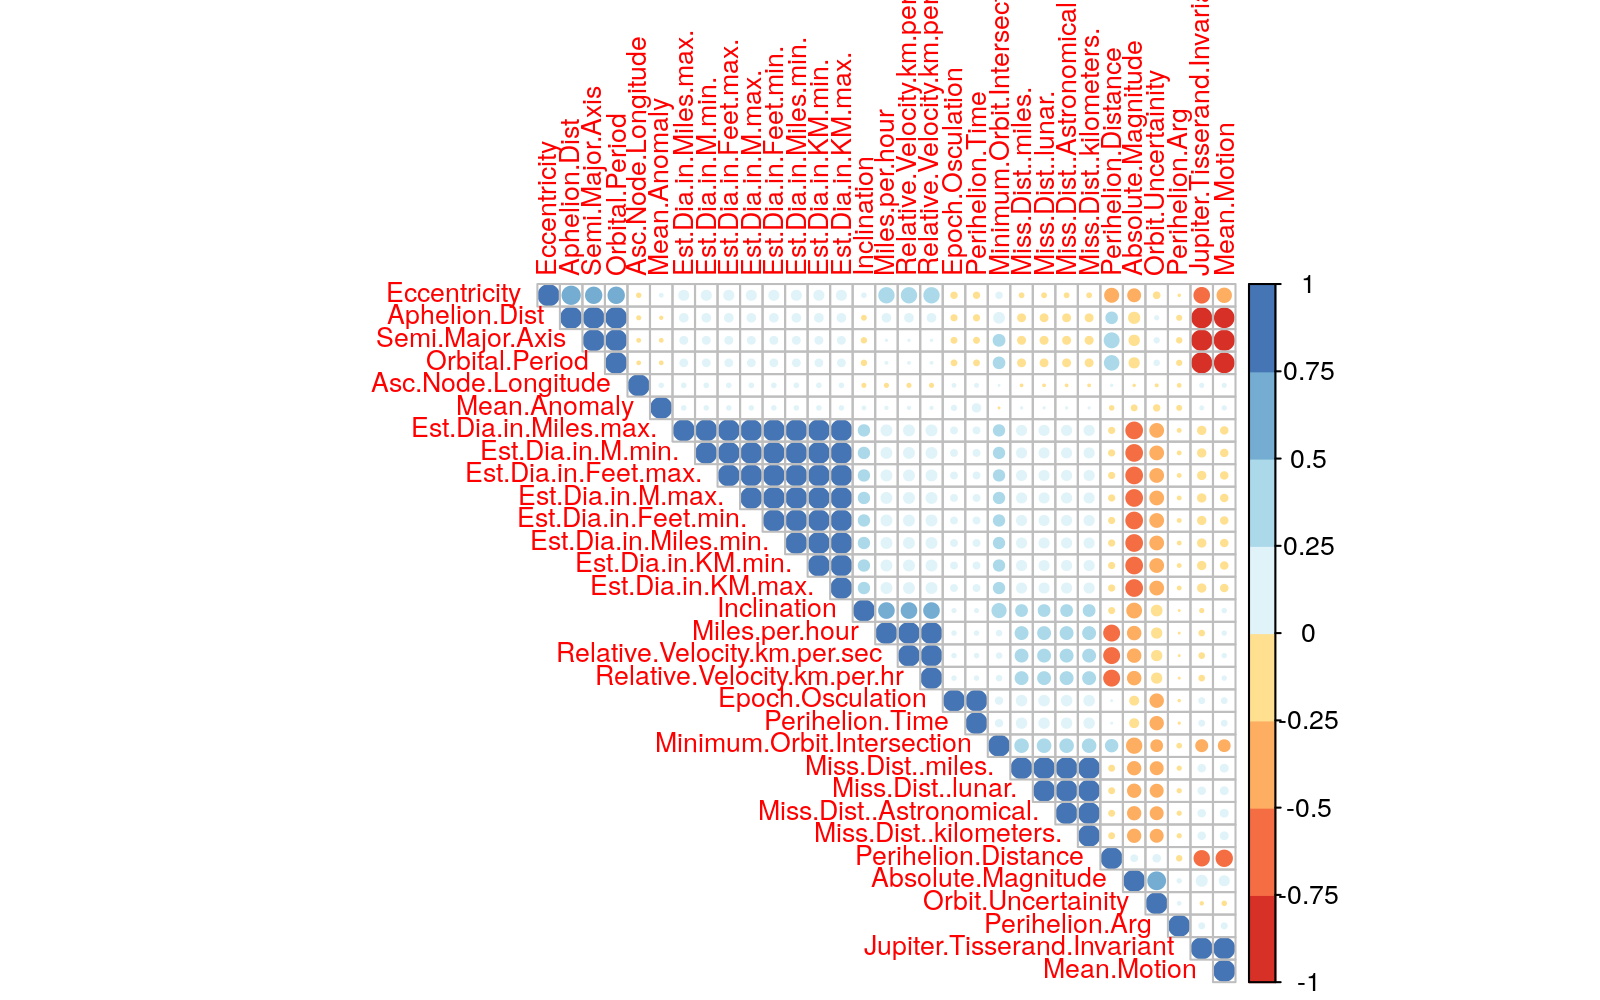

In [16]:
cor_asteroides <- df_asteroids %>% dplyr::select(where(is.numeric)) %>% cor()
library(corrplot)
library(RColorBrewer)

options(repr.plot.height=5,repr.plot.width=8,repr.plot.res = 200)

corrplot(cor_asteroides, type="upper", order="hclust", col=brewer.pal(n=8, name="RdYlBu"), tl.cex = 0.8)

Hay correlacioens perfectas que tenemos que quitar, por ejemplo las medidas en diferentes unidades:

In [17]:
df_asteroids %>% select(starts_with("Est.Dia")) %>% cor()

,Est.Dia.in.KM.min.,Est.Dia.in.KM.max.,Est.Dia.in.M.min.,Est.Dia.in.M.max.,Est.Dia.in.Miles.min.,Est.Dia.in.Miles.max.,Est.Dia.in.Feet.min.,Est.Dia.in.Feet.max.
Est.Dia.in.KM.min.,1,1,1,1,1,1,1,1
Est.Dia.in.KM.max.,1,1,1,1,1,1,1,1
Est.Dia.in.M.min.,1,1,1,1,1,1,1,1
Est.Dia.in.M.max.,1,1,1,1,1,1,1,1
Est.Dia.in.Miles.min.,1,1,1,1,1,1,1,1
Est.Dia.in.Miles.max.,1,1,1,1,1,1,1,1
Est.Dia.in.Feet.min.,1,1,1,1,1,1,1,1
Est.Dia.in.Feet.max.,1,1,1,1,1,1,1,1


Eliminamos las columnas que tienen una correlación superación a 0.95:

In [19]:
library(caret)
df_asteroids_numeric <- df_asteroids %>% dplyr::select(where(is.numeric)) 
cor_asteroides <- df_asteroids_numeric %>% cor()
col_to_remove = findCorrelation(cor_asteroides, cutoff=0.95) 

df_asteroids_reduced = df_asteroids_numeric[,-c(col_to_remove)]
df_asteroids_reduced$Hazardous <- df_asteroids$Hazardous 
str(df_asteroids_reduced)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




'data.frame':	3692 obs. of  16 variables:
 $ Absolute.Magnitude          : num  22.6 16.9 26.3 24.7 24.5 22.7 26.3 23.6 20.7 23.9 ...
 $ Est.Dia.in.Feet.min.        : num  263.4 3635.3 47.9 100.1 109.8 ...
 $ Relative.Velocity.km.per.sec: num  16.1 11.2 16 23.2 14.8 ...
 $ Miss.Dist..miles.           : num  28718094 24667792 548364 1466522 3719902 ...
 $ Orbit.Uncertainity          : int  7 0 7 8 8 6 8 7 1 8 ...
 $ Minimum.Orbit.Intersection  : num  0.08492 0.03811 0.00534 0.0127 0.01769 ...
 $ Eccentricity                : num  0.518 0.417 0.631 0.762 0.649 ...
 $ Inclination                 : num  28.974 16.695 6.689 0.965 3.829 ...
 $ Asc.Node.Longitude          : num  4.32 219.39 168.08 297 4.97 ...
 $ Orbital.Period              : num  1073 676 1078 1388 1269 ...
 $ Perihelion.Distance         : num  0.988 0.879 0.759 0.58 0.806 ...
 $ Perihelion.Arg              : num  315 140 246 320 284 ...
 $ Perihelion.Time             : num  2457603 2458321 2457684 2457594 2457601 ...
 $ Mea

In [20]:
?findCorrelation

In [22]:
table(df_asteroids_reduced$Hazardous)


False  True 
 3116   576 

In [24]:
df_asteroids_reduced$Hazardous <- as.factor(df_asteroids_reduced$Hazardous)
idx <- sample(1:nrow(df_asteroids_reduced), nrow(df_asteroids_reduced)*0.7)
df_train <- df_asteroids_reduced[ idx,]
df_test  <- df_asteroids_reduced[-idx,]

In [25]:
table(df_train$Hazardous)


False  True 
 2158   426 

In [26]:
head(df_train)

,Absolute.Magnitude,Est.Dia.in.Feet.min.,Relative.Velocity.km.per.sec,Miss.Dist..miles.,Orbit.Uncertainity,Minimum.Orbit.Intersection,Eccentricity,Inclination,Asc.Node.Longitude,Orbital.Period,Perihelion.Distance,Perihelion.Arg,Perihelion.Time,Mean.Anomaly,Mean.Motion,Hazardous
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2063,26.2,50.18108,23.464310,44865984,5,0.00656961,0.3279921,3.4940094,45.304248,457.0703,0.7803644,87.94026,2458221,186.0219,0.7876250,False
3619,25.4,72.53373,8.178061,11528627,6,0.00361704,0.3968356,1.5047656,9.750383,339.7526,0.5747495,127.49003,2457879,128.5098,1.0595944,False
1416,20.4,725.33733,10.650547,23169550,1,0.08476190,0.1741189,10.0537733,247.077725,354.7167,0.8099154,211.45410,2458023,337.5635,1.0148943,False
2864,24.1,131.98970,16.770034,9335351,0,0.00866404,0.5403317,0.5508616,259.835632,784.4350,0.7651565,177.36053,2458129,301.1843,0.4589290,False
2650,24.3,120.37603,6.445515,19312154,2,0.00180294,0.2012707,2.3416971,216.425777,356.5254,0.7859489,78.74582,2457852,150.3037,1.0097457,False
1899,22.0,347.16827,8.055729,21834062,6,0.09937570,0.2063014,14.6646787,242.123037,420.0576,0.8712229,203.80674,2458188,198.9173,0.8570252,False


In [27]:
model_reglog <- glm(formula=Hazardous~., df_train, family = binomial())
summary(model_reglog)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Hazardous ~ ., family = binomial(), data = df_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2185  -0.0382  -0.0023   0.0000   5.8686  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   2.735e+02  3.329e+02   0.822   0.4113    
Absolute.Magnitude           -2.959e+00  2.431e-01 -12.173   <2e-16 ***
Est.Dia.in.Feet.min.         -3.533e-03  3.833e-04  -9.219   <2e-16 ***
Relative.Velocity.km.per.sec  4.241e-02  2.579e-02   1.645   0.1000    
Miss.Dist..miles.            -1.455e-08  9.906e-09  -1.469   0.1418    
Orbit.Uncertainity           -1.132e-01  5.858e-02  -1.932   0.0533 .  
Minimum.Orbit.Intersection   -1.236e+02  8.613e+00 -14.354   <2e-16 ***
Eccentricity                 -1.708e+00  2.538e+00  -0.673   0.5009    
Inclination                  -2.037e-02  1.510e-02  -1.348   0.1775    
Asc.Node.Longitude            7.018e-04  1.174e-03   0.598   0.5500    
Orbit

In [28]:
pred_train<-predict(model_reglog, df_train)

table(real=df_train$Hazardous,
     factor(pred_train>0, labels=c("False", "True")))

       
real    False True
  False  2107   51
  True     56  370

In [29]:
caret::confusionMatrix(data=factor(predict(model_reglog, df_train)>0, labels=c("False", "True")), 
                       reference=df_train$Hazardous,
                       positive='True')

Confusion Matrix and Statistics

          Reference
Prediction False True
     False  2107   56
     True     51  370
                                          
               Accuracy : 0.9586          
                 95% CI : (0.9502, 0.9659)
    No Information Rate : 0.8351          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8489          
                                          
 Mcnemar's Test P-Value : 0.699           
                                          
            Sensitivity : 0.8685          
            Specificity : 0.9764          
         Pos Pred Value : 0.8789          
         Neg Pred Value : 0.9741          
             Prevalence : 0.1649          
         Detection Rate : 0.1432          
   Detection Prevalence : 0.1629          
      Balanced Accuracy : 0.9225          
                                          
       'Positive' Class : True            
                     

In [30]:
df_test$pred<-predict(model_reglog,df_test)
df_test$pred_factor <- factor(df_test$pred>0, labels=c("False", "True"))
table(pred=df_test$pred_factor, real=df_test$Hazardous)

       real
pred    False True
  False   934   27
  True     24  123

In [31]:
caret::confusionMatrix(data=df_test$pred_factor, 
                       reference=df_test$Hazardous,
                       positive='True')

Confusion Matrix and Statistics

          Reference
Prediction False True
     False   934   27
     True     24  123
                                          
               Accuracy : 0.954           
                 95% CI : (0.9399, 0.9655)
    No Information Rate : 0.8646          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8017          
                                          
 Mcnemar's Test P-Value : 0.7794          
                                          
            Sensitivity : 0.8200          
            Specificity : 0.9749          
         Pos Pred Value : 0.8367          
         Neg Pred Value : 0.9719          
             Prevalence : 0.1354          
         Detection Rate : 0.1110          
   Detection Prevalence : 0.1327          
      Balanced Accuracy : 0.8975          
                                          
       'Positive' Class : True            
                     